# Replikacija članka

In [15]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.model_selection import cross_validate
from numpy import std
from sklearn.metrics import roc_auc_score

import numpy as np
from sklearn.metrics import recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

### O istraživanju 

###### Vrsta istraživanja prema 

- svrsi: Primjenjeno istraživanje - svrha istraživanja ima praktičnu primjenu, cilj je da korisnici ostanu na postojećoj mreži

- dubini: Objašnjavačko istraživanje - uspostavlja se uzročno-posljedična veza između churna i ostalih značajki, te se omogućuje kasnija generalizacija za ostale (potencijalno riskantne - za churn) korisnike

- vrsti korištenih podataka: Kvantitativno istraživanje - koristi se velika količina podataka uz koje se koriste statistički alati za njihovo mjerenje, podatci su numerički

- stupnju manipulacije varijablama: Promatračko istraživanje - prilikom sakupljanja podataka nije bilo nikakvih intervencija

- vrsta zaključka: Deduktivno istraživanje - zaključci se donose uz pomoć donesenih općih zakona, npr. koje značajke utječu na churn

- vremenu provedbe: Studija presjeka ili sinkrono istraživanje - promatranje se odvija samo u određenom trenutku

- izvoru informacija: Sekundarno istraživanje - istraživači nisu prikupili podatke iz prve ruke već su ih preuzeli od operatera


###### Metode kako su podatci za članak prikupljeni:

- Dokumentarno istraživanje - Preuzeti podatci su javno dostupni, odnosno koriste se postojeći izvori informacija

###### Pravila istraživačke etike
- Podatci su prikupljeni i objavljeni prema pravilima istraživačke etike zbog toga što su sudionici anonimni, odnosno nema u podatcima nikakvih podataka koji bi upućivali izravno na neku osobu. Osim toga podatci nisu modificirani iz razloga što su to službeni podatci od telekom operatera, te njima ide u korist da završni algoritam bude što precizniji kako bi zadržali što više korisnika.

### Učitavanje podataka

In [2]:

X_small = pd.read_csv('dataset_2_churn-bigml.csv')
X_small.columns = [c.strip().lower().replace(' ', '_') for c in X_small.columns] 
#Preimenovanje u mala slova i bez razmaka za lakše rukovanje sa podatcima


In [3]:
X_big = pd.read_csv('dataset_1_south_asia.csv')
X_big.columns = [c.strip().lower().replace(' ', '_') for c in X_big.columns]

### Pretprocesiranje podataka

-provjera null i nedostajućih vrijednosti

-provjera stršećih vrijednosti


In [4]:
print(X_small.isna().sum())
#X_small nema nedostajućih vrijednosti

state                     0
account_length            0
area_code                 0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [5]:
X_small.describe()
#X_small na prvi pogled nema nikakvih stršećih vrijednosti
#ovo sam zaključio pogledom na min,max i srednje vrijednosti

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### U prvom dijelu će biti prikazan postupak za manji dataset - dataset_2_churn-bigml 

# Vizualizacija podataka - korelacija između churna i ostalih atributa
- korištenjem box plot dijagrama možemo zaključiti o nekim korelacijama između podatka koji nas zanima - churn, i ostalih značajki
- primjer toga je prvi box plot gdje vidimo kako korisnici koji spadaju u kategoriju churn imaju vidno više poziva prema službi za korisnike od onih koji ne spadaju u kategoriju churn, slično vidimo kako churn korisnici imaju više dnevnih poziva i veću naplatu tokom dana

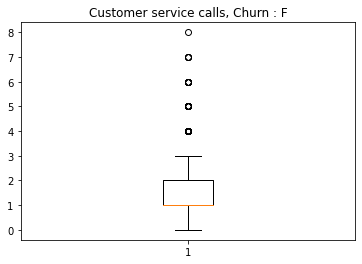

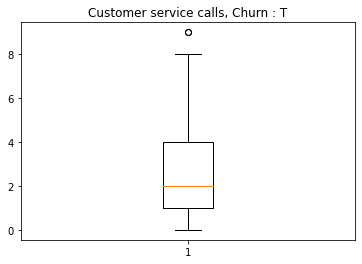

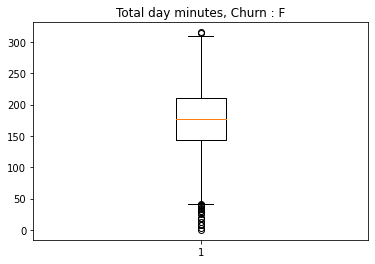

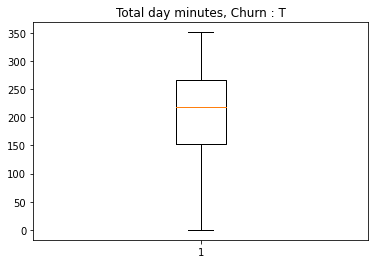

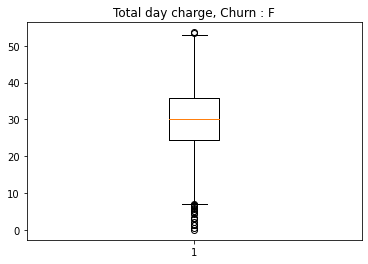

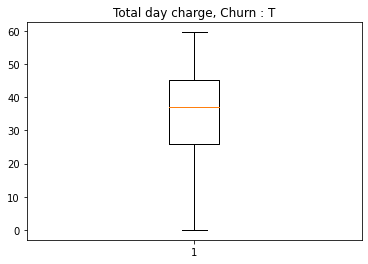

In [6]:
groups = X_small.groupby('churn')
a=0
for name, group in groups:
    fig1, ax1 = plt.subplots()
    ax1.set_title('Customer service calls, Churn : '+str(name))
    ax1.boxplot(group.customer_service_calls)  
for name, group in groups:
    fig2, ax2 = plt.subplots()
    ax2.set_title('Total day minutes, Churn : '+str(name))
    ax2.boxplot(group.total_day_minutes)
    
for name, group in groups:
    fig2, ax2 = plt.subplots()
    ax2.set_title('Total day charge, Churn : '+str(name))
    ax2.boxplot(group.total_day_charge)

- preko korelacijske matrice možemo vidjeti korelaciju između svih parova značajki, ovdje je očito kako jedine značajke koje su međusobno korelirane su dnevne minute i dnevna potrošnja, večernje minute i večernja potrošnja, internacionalne minute i internacionalna potrošnja, te noćne minute i noćna potrošnja
- značajke koje su u korelaciji ovisno o modelu je možda bolje ponekad izbaciti da ostane samo jedna od njih, dok je recimo u članku rečeno kako najbolja metoda - random forest - i bolje funkcionira kada postoje određene korelacije između značajki
- pošto se radi replikacija članka, uzet ću značajke koje su uzeli oni u članku - a to su sve numeričke značajke

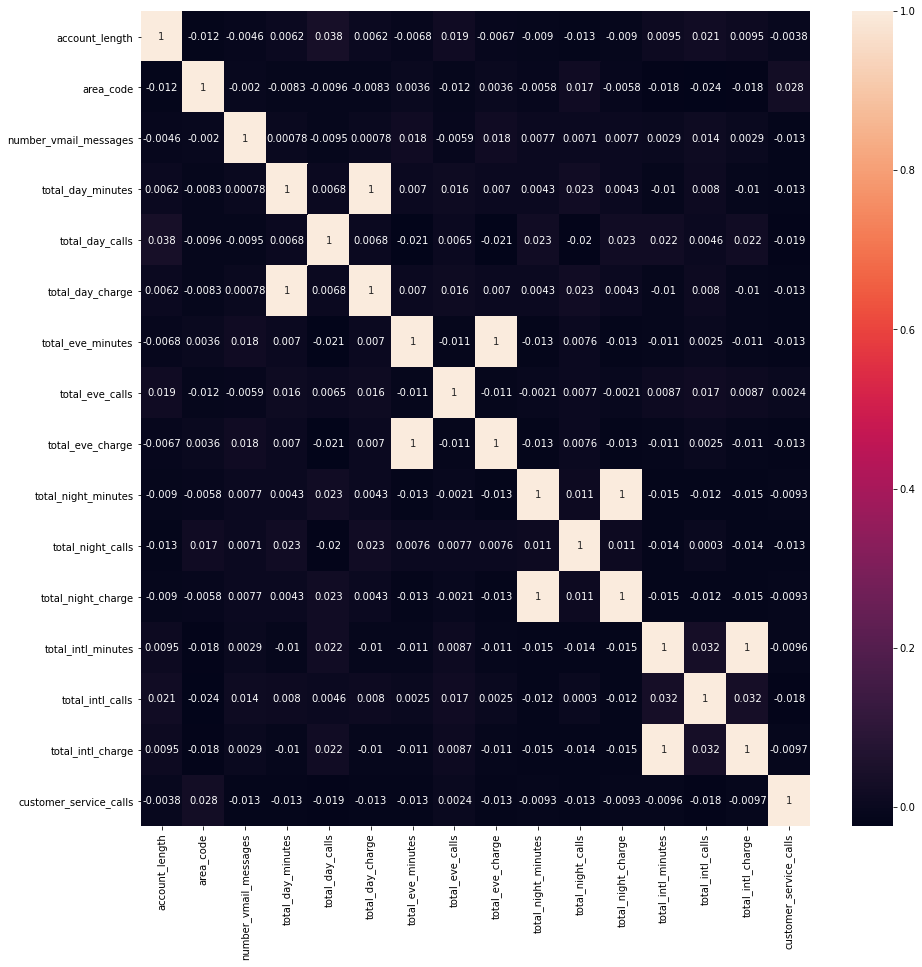

In [7]:
import seaborn as sn
corrMatrix = X_small.corr()
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Pretprocesiranje podataka

In [8]:

Y_small=X_small.pop('churn')
#uklanjanje ciljne varijable iz dataseta

X_small.drop(('state'), axis=1, inplace=True)
#uklananje ne-numeričke značajke iz dataseta

Y_small = Y_small.map({'T':1 ,'F':0})
#za churn se prije koristilo T za pozitivne i F za negativne vrijednosti, što nije radilo sa programskim paketima,
#pa sam zamijenio sa 1 i 0

Kod X_small dataseta se u članku koristi svih 16 numeričkih značajki, te nije potrebno raditi feature selection



In [9]:


names=[]
scores=[]
values=[]
TNS=[]
FPS=[]
FNS=[]
TPS=[]
recalls=[]
f1S=[]
rocS=[]
times=[]



#u idućoj funkciji predaje se model koji se istrenira uz pomoć cross validationa te se računa predikcija
#te confusion matrica iz koje se dobivaju vrijednosti TP,FP,TN,FN, uz pomoć čega čega se računaju dodatni parametri
#(tp rate...)
def kMeans(model,X,y):
    t0=time.time()
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    validat = cross_validate(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1,return_estimator=True)
    max_i=0
    max_val=0
    i=0
    print ("training time:", round(time.time()-t0, 3), "s" )
    times.append(str(time.time()-t0)+"s")
    for val in validat['test_score']:
        if(val>max_val):
            max_val=val
            max_i=i
        i+=1
    best_model=validat['estimator'].pop(max_i)
    Y_predicted=best_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
    print("TP: "+ str(tp))
    print("FP: "+ str(fp))
    print("FN: "+ str(fn))
    print("TN: "+ str(tn))
    TNS.append(tn)
    FPS.append(fp)
    FNS.append(fn)
    TPS.append(tp)
    recall = recall_score(Y_test, Y_predicted, average='binary')
    recalls.append(recall)
    f1=f1_score(Y_test, Y_predicted, average='macro')
    f1S.append(f1)
    roc=roc_auc_score(Y_test, Y_predicted)
    rocS.append(roc)
    best_score=validat['test_score'].item(max_i)
    scores.append(best_score*100)
    return best_score*100,best_model



# Klasifikacija 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_small, Y_small, test_size=0.15, random_state=0)
#ovdje je dataset podijeljen na dio za treniranje (onaj koji se koristi u 10-fold cross validationu)
# i na dio za testiranje (za izračunavanje predikcije na neviđenom skupu podataka)

In [11]:
from sklearn import tree
import time


model=tree.DecisionTreeClassifier()
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Decision tree clasifier')



training time: 2.41 s
TP: 42
FP: 22
FN: 32
TN: 404
87.98586572438163


In [12]:
#Stohastic gradient descent (SGD)
model=linear_model.SGDClassifier(max_iter=5, tol=None,class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Stochastic gradient descent (SGD) learning')


training time: 0.037 s
TP: 2
FP: 0
FN: 72
TN: 426
85.15901060070671


In [13]:
# Random Forest

model = RandomForestClassifier(n_estimators=20, random_state=0)
names.append('Random forest')
score,best_model=kMeans(model,X_train,Y_train)
print(score)



training time: 0.382 s
TP: 40
FP: 3
FN: 34
TN: 423
94.34628975265018


In [14]:
#u nastavku su dane važnosti značajki po ulaznoj vrijednosti za random forest - najbolji algoritam
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(17)

,importance
feature,
total_day_minutes,0.147
total_day_charge,0.136
customer_service_calls,0.113
total_eve_charge,0.092
total_eve_minutes,0.076
number_vmail_messages,0.051
total_day_calls,0.049
total_night_minutes,0.048
total_night_charge,0.046


<AxesSubplot:xlabel='feature'>

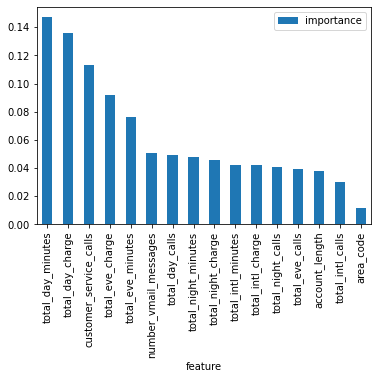

In [15]:
importances.plot.bar()

training time: 0.037 s
TP: 22
FP: 10
FN: 52
TN: 416
89.04593639575971


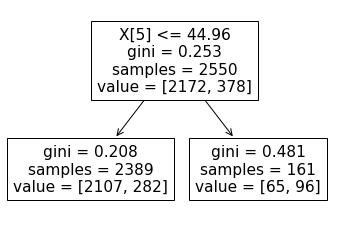

In [16]:
#decision stump

model=DecisionTreeClassifier(max_depth = 1)
score,best_model=kMeans(model,X_train,Y_train)
tree.plot_tree(best_model)
print(score)
names.append('Decision stump')


In [17]:
#naive bayes

model=GaussianNB()
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Naive bayes')


training time: 0.035 s
TP: 32
FP: 8
FN: 42
TN: 418
92.226148409894


In [18]:
#perceptron
#parametar class_weight je stavljen kako bi pridavao veću težinu za pozitivan churn koji je puno manje zastupljen od
#negativnog churna
model=Perceptron(class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Perceptron')


training time: 0.041 s
TP: 0
FP: 0
FN: 74
TN: 426
87.32394366197182


In [19]:
#logistics regression

model=LogisticRegression(random_state=0,max_iter=1000)
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Logistics regression')



training time: 0.443 s
TP: 6
FP: 4
FN: 68
TN: 422
91.16607773851591


- u nastavku vidimo accuracy od pojedinih algoritama gdje je, kao i u članku, random forest nabolji

Text(0.5, 1.0, 'Classifier accuracy')

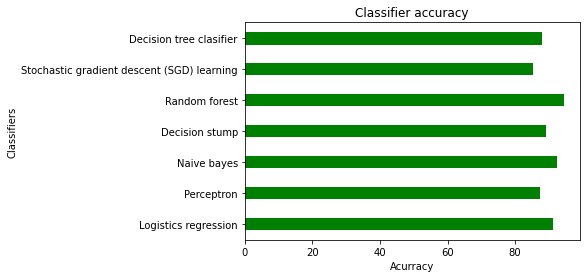

In [20]:

fig, ax = plt.subplots()
ax.barh(names, scores,height=0.4,align='center', color='g')
#ax.barh(names,neg_scores,height=0.4,align='center', color='r')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Acurracy')
ax.set_ylabel('Classifiers')
ax.set_title('Classifier accuracy')



    


- osim samog accuracy-a, ima još bitnih faktora kod određivanja najboljeg algoritma
- u nastavku su prikazani podatci koji su prikazani i u članku
- rezultati tih parametara nisu isti kao u članku, u članku nisu dani detalji parametara od pojedinih algoritama

In [21]:


TP_rate=[]
FP_rate=[]
ACC=[]
precision=[]

for i in range(len(names)):
    print(names[i]+ " " + str(scores[i]))
    
print("______________________")
    
for i in range(len(names)):
    TP_rate.append(TPS[i]/(TPS[i]+FNS[i]))
    print(names[i]+ " TP rate: " + str(TPS[i]/(TPS[i]+FNS[i])))
    
print("______________________")
    
for i in range(len(names)):
    FP_rate.append(str(FPS[i]/(FPS[i]+TNS[i])))
    print(names[i]+ " FP rate: " + str(FPS[i]/(FPS[i]+TNS[i])))
    
    
print("______________________")

for i in range(len(names)):
    ACC.append((TPS[i]+TNS[i])/(FPS[i]+TNS[i]+TPS[i]+FNS[i]))
    print(names[i]+ " ACC: " + str((TPS[i]+TNS[i])/(FPS[i]+TNS[i]+TPS[i]+FNS[i])))
    
print("______________________")
    
for i in range(len(names)):
    precision.append(TPS[i]/(TPS[i]+FPS[i]))
    print(names[i]+ " Precision : " + str(TPS[i]/(TPS[i]+FPS[i])))
    
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " Recall : " + str(recalls[i]))
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " F-measure : " + str(f1S[i]))

print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " ROC area : " + str(rocS[i]))
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " Time to build : " + times[i])

    
col_labels=names
row_labels=['TP rate','FP rate','Accuracy','Precision','Recall','F-measure','ROC area']
table_vals=[]
table_vals.append(TP_rate)
table_vals.append(FP_rate)
table_vals.append(ACC)
table_vals.append(precision)
table_vals.append(recalls)
table_vals.append(f1S)
table_vals.append(rocS)
table_vals=np.transpose(table_vals)


Decision tree clasifier 87.98586572438163
Stochastic gradient descent (SGD) learning 85.15901060070671
Random forest 94.34628975265018
Decision stump 89.04593639575971
Naive bayes 92.226148409894
Perceptron 87.32394366197182
Logistics regression 91.16607773851591
______________________
Decision tree clasifier TP rate: 0.5675675675675675
Stochastic gradient descent (SGD) learning TP rate: 0.02702702702702703
Random forest TP rate: 0.5405405405405406
Decision stump TP rate: 0.2972972972972973
Naive bayes TP rate: 0.43243243243243246
Perceptron TP rate: 0.0
Logistics regression TP rate: 0.08108108108108109
______________________
Decision tree clasifier FP rate: 0.051643192488262914
Stochastic gradient descent (SGD) learning FP rate: 0.0
Random forest FP rate: 0.007042253521126761
Decision stump FP rate: 0.023474178403755867
Naive bayes FP rate: 0.018779342723004695
Perceptron FP rate: 0.0
Logistics regression FP rate: 0.009389671361502348
______________________
Decision tree clasifier ACC

<ipython-input-21-9be6e1cbc6ef>:31: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(TPS[i]/(TPS[i]+FPS[i]))
<ipython-input-21-9be6e1cbc6ef>:32: RuntimeWarning: invalid value encountered in longlong_scalars
  print(names[i]+ " Precision : " + str(TPS[i]/(TPS[i]+FPS[i])))


- u nastavku je prikazan ROC area curve, kao i u članku
- što je veća vrijednost, to je bolja mogućnost klasifikatora da raspozna između dvije klase, odnosno da primjer svrsta u pripadnu klasu

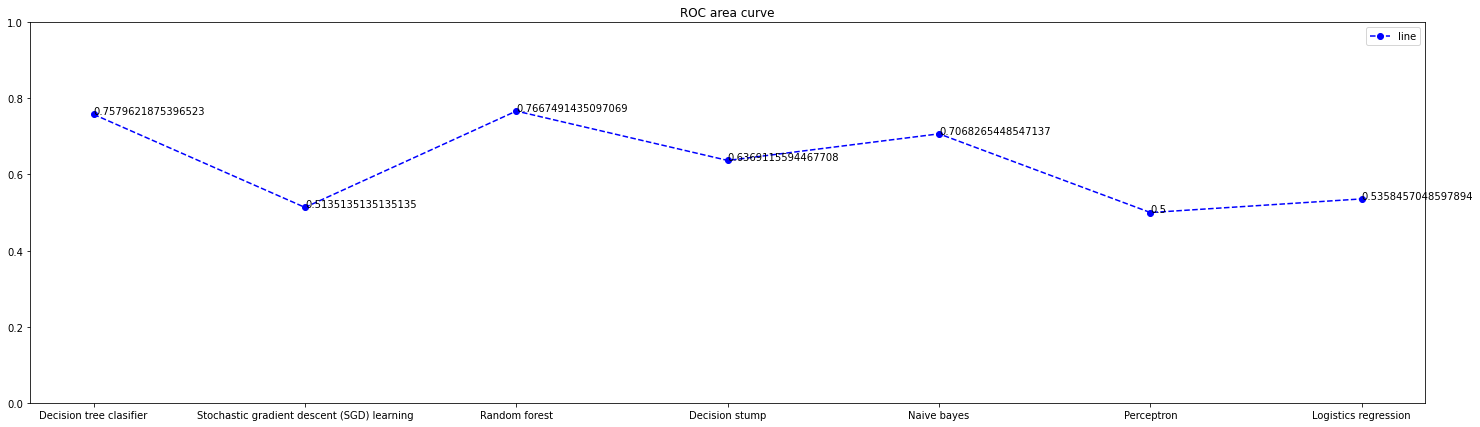

In [22]:
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()

#### Profiliranje korisnika pomoću k-means
- cilj je svrstati postojeće korisnike u 3 klase - malo vjerovatno, srednje vjerovatno i veće vjerovatnosti da postanu churn korisnici, te u skladu s tim ponuditi pripadnim korisnicima određene pogodnosti kako bi ih zadržali na mreži
- k means algoritam radi podjelu korisnika na n kategorija (u ovom slučaju 3)
- u nastavku je prikazan dio grafova koji su prikazani i u članku

In [23]:
from sklearn.cluster import KMeans


X_small = pd.read_csv('dataset_2_churn-bigml.csv')
X_small.columns = [c.strip().lower().replace(' ', '_') for c in X_small.columns]

#zanimaju nas samo korisnici sa churn=T, odnosno samo oni koji su prešli na drugu mrežu

X_small = X_small[X_small.churn != 'F']
Y_small=X_small.pop('churn')
X_small.drop(('state'), axis=1, inplace=True)
Y_small = Y_small.map({'T':1 ,'F':0})

X=X_small
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [24]:
#print(y_kmeans)
first= X[0:0]
second=X[0:0]
third=X[0:0]

for y,row in zip(y_kmeans,X.iterrows()):
    #print (type(row[1]))
    if(y==0):
        first=first.append(row[1],ignore_index=True)
    elif(y==1):
        second=second.append(row[1])
    elif(y==2):
        third=third.append(row[1])
        
first.describe()



,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.328502,434.676329,7.806763,141.270531,99.661836,24.01657,185.178261,100.405797,15.740435,194.469565,99.429952,8.751256,10.736232,3.975845,2.899227,3.178744
std,38.742469,41.029075,14.052998,38.444496,22.387185,6.53584,47.153276,19.084624,4.007836,45.778520,20.077850,2.059929,2.691481,2.400323,0.726979,1.966203
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,70.900000,56.000000,6.030000,47.400000,49.000000,2.130000,3.900000,1.000000,1.050000,0.000000
25%,81.000000,408.000000,0.000000,119.750000,86.000000,20.35500,159.250000,87.000000,13.540000,166.200000,84.000000,7.480000,8.900000,2.000000,2.400000,1.000000
50%,103.000000,415.000000,0.000000,145.000000,100.000000,24.65000,184.900000,101.000000,15.720000,192.600000,98.000000,8.670000,10.700000,3.000000,2.890000,4.000000
75%,125.000000,415.000000,7.500000,167.100000,115.000000,28.41000,213.050000,114.000000,18.110000,222.850000,115.000000,10.030000,12.800000,5.000000,3.460000,5.000000
max,225.000000,510.000000,48.000000,227.100000,165.000000,38.61000,339.900000,159.000000,28.890000,332.700000,152.000000,14.970000,17.900000,15.000000,4.830000,8.000000


In [25]:
second.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,102.954545,412.666667,1.924242,260.374747,102.070707,44.264242,235.790404,99.712121,20.041919,213.419697,99.717172,9.604091,10.567677,4.297980,2.853990,1.500000
std,38.438202,3.308196,7.441093,35.455670,21.691306,6.027810,46.183422,20.456788,3.925477,45.344387,19.725291,2.040823,2.909300,2.624967,0.785341,1.431162
min,12.000000,408.000000,0.000000,154.000000,44.000000,26.180000,129.400000,48.000000,11.000000,105.400000,57.000000,4.740000,2.000000,1.000000,0.540000,0.000000
25%,75.250000,408.000000,0.000000,235.375000,87.000000,40.015000,205.700000,86.000000,17.480000,180.675000,84.000000,8.127500,8.700000,2.000000,2.350000,1.000000
50%,103.500000,415.000000,0.000000,265.250000,104.000000,45.090000,233.750000,100.000000,19.865000,213.600000,100.000000,9.610000,10.400000,4.000000,2.810000,1.000000
75%,126.750000,415.000000,0.000000,282.200000,117.750000,47.977500,266.175000,113.000000,22.622500,248.550000,113.750000,11.182500,12.775000,5.750000,3.452500,2.000000
max,212.000000,415.000000,42.000000,350.800000,156.000000,59.640000,363.700000,168.000000,30.910000,354.900000,152.000000,15.970000,18.300000,15.000000,4.940000,9.000000


In [26]:
third.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,97.512821,510.0,6.076923,245.414103,103.910256,41.720769,225.329487,103.128205,19.153590,213.007692,104.705128,9.585128,10.939744,4.320513,2.954103,1.564103
std,43.824841,0.0,12.802972,46.856373,18.855008,7.965398,42.150821,19.539078,3.582906,49.939594,19.877618,2.247414,2.774201,2.746869,0.748747,1.295243
min,16.000000,510.0,0.000000,145.000000,61.000000,24.650000,119.600000,60.000000,10.170000,73.200000,51.000000,3.290000,4.300000,1.000000,1.160000,0.000000
25%,69.000000,510.0,0.000000,223.900000,91.500000,38.067500,197.100000,90.250000,16.752500,182.250000,93.000000,8.205000,8.975000,2.250000,2.420000,0.250000
50%,98.500000,510.0,0.000000,247.000000,104.000000,41.990000,225.800000,102.500000,19.195000,212.950000,106.500000,9.580000,10.750000,4.000000,2.905000,1.000000
75%,130.500000,510.0,0.000000,278.375000,118.000000,47.327500,254.800000,115.000000,21.660000,250.700000,119.000000,11.282500,12.875000,6.000000,3.475000,2.000000
max,209.000000,510.0,42.000000,345.300000,143.000000,58.700000,350.900000,151.000000,29.830000,312.100000,158.000000,14.040000,20.000000,20.000000,5.400000,5.000000


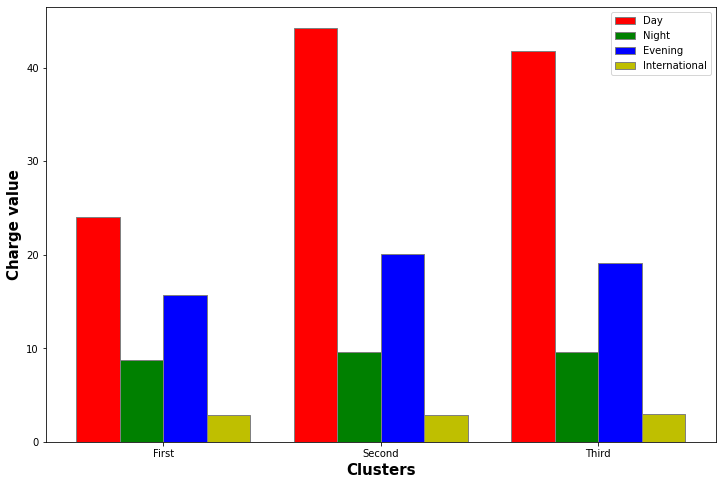

In [27]:
names=["first","second","third"]
avg_night=[np.average(first.total_night_charge),np.average(second.total_night_charge),np.average(third.total_night_charge)]
avg_day=[np.average(first.total_day_charge),np.average(second.total_day_charge),np.average(third.total_day_charge)]
avg_eve=[np.average(first.total_eve_charge),np.average(second.total_eve_charge),np.average(third.total_eve_charge)]
avg_intl=[np.average(first.total_intl_charge),np.average(second.total_intl_charge),np.average(third.total_intl_charge)]
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(avg_day))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, avg_day, color ='r', width = barWidth,
        edgecolor ='grey', label ='Day')
plt.bar(br2, avg_night, color ='g', width = barWidth,
        edgecolor ='grey', label ='Night')
plt.bar(br3, avg_eve, color ='b', width = barWidth,
        edgecolor ='grey', label ='Evening')
plt.bar(br4, avg_intl, color ='y', width = barWidth,
        edgecolor ='grey', label ='International')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Charge value', fontweight ='bold', fontsize = 15)
plt.xticks([0.1+r + barWidth for r in range(len(avg_day))],
        ['First', 'Second', 'Third'])
 
plt.legend()

plt.show()

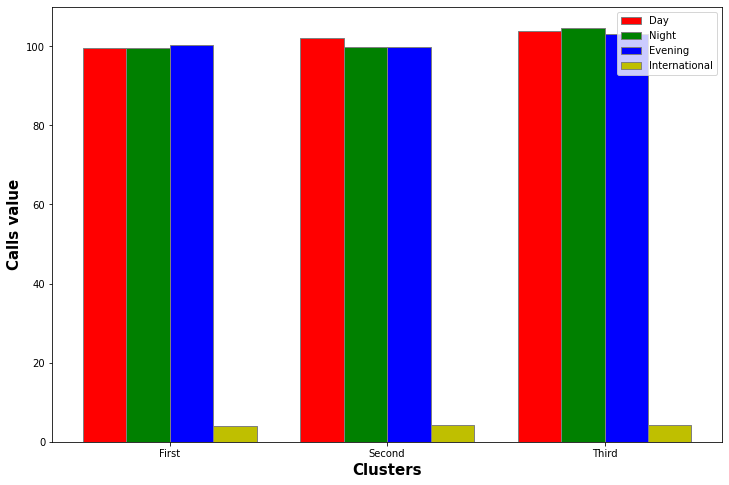

In [28]:
names=["first","second","third"]
avg_night=[np.average(first.total_night_calls),np.average(second.total_night_calls),np.average(third.total_night_calls)]
avg_day=[np.average(first.total_day_calls),np.average(second.total_day_calls),np.average(third.total_day_calls)]
avg_eve=[np.average(first.total_eve_calls),np.average(second.total_eve_calls),np.average(third.total_eve_calls)]
avg_intl=[np.average(first.total_intl_calls),np.average(second.total_intl_calls),np.average(third.total_intl_calls)]
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(avg_day))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, avg_day, color ='r', width = barWidth,
        edgecolor ='grey', label ='Day')
plt.bar(br2, avg_night, color ='g', width = barWidth,
        edgecolor ='grey', label ='Night')
plt.bar(br3, avg_eve, color ='b', width = barWidth,
        edgecolor ='grey', label ='Evening')
plt.bar(br4, avg_intl, color ='y', width = barWidth,
        edgecolor ='grey', label ='International')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Calls value', fontweight ='bold', fontsize = 15)
plt.xticks([0.1+r + barWidth for r in range(len(avg_day))],
        ['First', 'Second', 'Third'])
 
plt.legend()

plt.show()

### U nastavku slijedi obrada za X_big dataset
- U X_big datasetu potrebno je smanjiti broj značajki sa 29 na 17

In [29]:
pd.set_option('display.max_columns', None)
X_big.describe()
#stršeće vrijednosti je jako teško za odrediti na ovaj način, prikladnije bi bilo pomoću box plota, međutim
#u radu se nije niti spominjalo nikakvo uklanjanje outliera

,msisdn,total_calls_p1,total_mins_p1,total_calls_rev_p1,onnet_calls_p1,onnet_mins_p1,onnet_rev_p1,offnet_calls_p1,offnet_mins_p1,offnet_rev_p1,idd_calls_p1,idd_mins_p1,idd_rev_p1,free_calls_p1,free_mins_p1,chrgd_calls_p1,chrgd_mins_p1,chrgd_rev_p1,total_calls_p2,total_mins_p2,total_calls_rev_p2,onnet_calls_p2,onnet_mins_p2,onnet_rev_p2,offnet_calls_p2,offnet_mins_p2,offnet_rev_p2,idd_calls_p2,idd_mins_p2,idd_rev_p2,free_calls_p2,free_mins_p2,chrgd_calls_p2,chrgd_mins_p2,chrgd_rev_p2,total_calls_p6,total_mins_p6,total_calls_rev_p6,onnet_calls_p6,onnet_mins_p6,onnet_rev_p6,offnet_calls_p6,offnet_mins_p6,offnet_rev_p6,idd_calls_p6,idd_mins_p6,idd_rev_p6,free_calls_p6,free_mins_p6,chrgd_calls_p6,chrgd_mins_p6,chrgd_rev_p6,total_calls_p3,total_mins_p3,total_calls_rev_p3,onnet_calls_p3,onnet_mins_p3,onnet_rev_p3,offnet_calls_p3,offnet_mins_p3,offnet_rev_p3,idd_calls_p3,idd_mins_p3,idd_rev_p3,free_calls_p3,free_mins_p3,chrgd_calls_p3,chrgd_mins_p3,chrgd_rev_p3,total_calls_p4,total_mins_p4,total_calls_rev_p4,onnet_calls_p4,onnet_mins_p4,onnet_rev_p4,offnet_calls_p4,offnet_mins_p4,offnet_rev_p4,idd_calls_p4,idd_mins_p4,idd_rev_p4,free_calls_p4,free_mins_p4,chrgd_calls_p4,chrgd_mins_p4,chrgd_rev_p4,rechrg_total_subs_p1,rechrg_total_trans_p1,rechrg_total_load_p1,rechrg_total_subs_p2,rechrg_total_trans_p2,rechrg_total_load_p2,rechrg_total_subs_p3,rechrg_total_trans_p3,rechrg_total_load_p3,rechrg_total_subs_p4,rechrg_total_trans_p4,rechrg_total_load_p4,rechrg_total_subs_p6,rechrg_total_trans_p6,rechrg_total_load_p6,rechrg_inc_min_used_p1,incoming_total_calls_p1,incoming_inc_rev_p1,rechrg_inc_min_used_p2,incoming_total_calls_p2,incoming_inc_rev_p2,rechrg_inc_min_used_p3,incoming_total_calls_p3,incoming_inc_rev_p3,rechrg_inc_min_used_p4,incoming_total_calls_p4,incoming_inc_rev_p4,rechrg_inc_min_used_p6,incoming_total_calls_p6,incoming_inc_rev_p6,total_incoming_min_p1,total_incoming_rev_p1,total_outgoing_min_p1,tota_outgoing_rev_p1,total_vas_rev_p1,arpu_p1,total_incoming_min_p2,total_incoming_rev_p2,total_outgoing_min_p2,tota_outgoing_rev_p2,total_vas_rev_p2,arpu_p2,total_incoming_min_p3,total_incoming_rev_p3,total_outgoing_min_p3,tota_outgoing_rev_p3,total_vas_rev_p3,arpu_p3,total_incoming_min_p4,total_incoming_rev_p4,total_outgoing_min_p4,tota_outgoing_rev_p4,total_vas_rev_p4,arpu_p4,total_incoming_min_p6,total_incoming_rev_p6,total_outgoing_min_p6,tota_outgoing_rev_p6,total_vas_rev_p6,arpu_p6,unique_subs_sms_p1,total_sms_p1,chargd_sms_p1,free_sms_p1,revenue_sms_p1,unique_subs_sms_p2,total_sms_p2,chargd_sms_p2,free_sms_p2,revenue_sms_p2,unique_subs_sms_p3,total_sms_p3,chargd_sms_p3,free_sms_p3,revenue_sms_p3,unique_subs_sms_p4,total_sms_p4,chargd_sms_p4,free_sms_p4,revenue_sms_p4,unique_subs_sms_p6,total_sms_p6,chargd_sms_p6,free_sms_p6,revenue_sms_p6,balance_end_p2,status_end_p2,last_rchrg_amt
count,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913

In [30]:
#provjera duplikata
duplicateRowsDF = X_big[X_big.duplicated()]
print(duplicateRowsDF)
#nema duplikata

Empty DataFrame
Columns: [msisdn, total_calls_p1, total_mins_p1, total_calls_rev_p1, onnet_calls_p1, onnet_mins_p1, onnet_rev_p1, offnet_calls_p1, offnet_mins_p1, offnet_rev_p1, idd_calls_p1, idd_mins_p1, idd_rev_p1, free_calls_p1, free_mins_p1, chrgd_calls_p1, chrgd_mins_p1, chrgd_rev_p1, total_calls_p2, total_mins_p2, total_calls_rev_p2, onnet_calls_p2, onnet_mins_p2, onnet_rev_p2, offnet_calls_p2, offnet_mins_p2, offnet_rev_p2, idd_calls_p2, idd_mins_p2, idd_rev_p2, free_calls_p2, free_mins_p2, chrgd_calls_p2, chrgd_mins_p2, chrgd_rev_p2, total_calls_p6, total_mins_p6, total_calls_rev_p6, onnet_calls_p6, onnet_mins_p6, onnet_rev_p6, offnet_calls_p6, offnet_mins_p6, offnet_rev_p6, idd_calls_p6, idd_mins_p6, idd_rev_p6, free_calls_p6, free_mins_p6, chrgd_calls_p6, chrgd_mins_p6, chrgd_rev_p6, total_calls_p3, total_mins_p3, total_calls_rev_p3, onnet_calls_p3, onnet_mins_p3, onnet_rev_p3, offnet_calls_p3, offnet_mins_p3, offnet_rev_p3, idd_calls_p3, idd_mins_p3, idd_rev_p3, free_calls_p

In [31]:
#pd.set_option("max_rows", None)
#print(X_big.isna().sum())
#X_big ima nedostajucih vrijednosti u package_name, balance_end_p2, status_end_p2, lst_rchrg_date, rchrg_amt_exp_date
#što bi inače trebali nadomjestiti, ali one nemaju veliku važnost u ovom slučaju zbog toga što su to značajke
#koje se niti ne koriste (bit će uklonjene zbog feature selectiona)
#Y_big=X_big.pop('churn')
#Y_big = Y_big.map({'T':1 ,'F':0})
#X_big.drop(columns=['package_name', 'balance_end_p2','status_end_p2','lst_rchrg_date','rchrg_amt_exp_date'])
#maknuo sam stupce sa nedostajucim vrijednostima zbog čega donje funkcije nisu ispravno radile
#X_train, X_test, Y_train, Y_test = train_test_split(X_big, Y_big, test_size=0.2, random_state=0)


In [32]:
#from sklearn.feature_selection import mutual_info_classif
#res = mutual_info_classif(X_big, Y_big)
#print(res)

Gore navedeni kod sam pokušao izvršiti na Jupyteru gdje je bacalo grešku da nema dovoljno memorije, nakon čega sam povećao dozvoljenu memoriju za Jupyter na 4gb, nakon čega se nakon nekog vremena izvršavanja ekran zacrnio i bio sam prisiljen izvršiti reboot laptopa. Nakon toga sam pokušao istu stvar u Google Colabu gdje mi se na ovom dijelu crashao kernel zbog manjka memorije. Iz tog razloga nemam izračunat Information Gain (IG) entropy na temelju kojeg bi odredio koje su značajke najrelevantnije te koje ćemo izbaciti (feature selection).

Dodatno sam pokušavao na razne načine smanjiti dataset ali sam nailazio na druge probleme te sam odlučio koristiti samo p1 dijelove dataseta koji je naveden da se koristi.

In [33]:
X_new = X_big[['total_calls_p1','total_mins_p1','total_calls_rev_p1','onnet_calls_p1','onnet_mins_p1','onnet_rev_p1','offnet_calls_p1','offnet_mins_p1','offnet_rev_p1','incoming_total_calls_p1','chrgd_calls_p1','chrgd_mins_p1','chrgd_rev_p1','free_calls_p1','free_mins_p1','revenue_sms_p1','rechrg_total_load_p1','churn']]


In [34]:
X_new.describe()

,total_calls_p1,total_mins_p1,total_calls_rev_p1,onnet_calls_p1,onnet_mins_p1,onnet_rev_p1,offnet_calls_p1,offnet_mins_p1,offnet_rev_p1,incoming_total_calls_p1,chrgd_calls_p1,chrgd_mins_p1,chrgd_rev_p1,free_calls_p1,free_mins_p1,revenue_sms_p1,rechrg_total_load_p1
count,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06
mean,2.161798e+02,7.277388e+02,2.838196e+02,1.312645e+02,6.222429e+02,7.856006e+01,8.406379e+01,1.030951e+02,1.874587e+02,2.016905e+02,1.204504e+02,1.714192e+02,2.838196e+02,9.572938e+01,5.563200e+02,2.868537e+01,5.883425e+02
std,3.825835e+02,2.073644e+03,5.326627e+02,3.082420e+02,2.052070e+03,1.897033e+02,1.688478e+02,2.220406e+02,3.750976e+02,3.220467e+02,2.139182e+02,3.453129e+02,5.326627e+02,2.921451e+02,1.971013e+03,7.253532e+01,8.819876e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.372000e+01,1.760000e+01,3.000000e+00,1.660000e+00,1.720000e+00,3.000000e+00,2.900000e+00,6.500000e+00,1.600000e+01,8.000000e+00,8.660000e+00,1.760000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
50%,7.400000e+01,1.042700e+02,1.031500e+02,2.400000e+01,2.695000e+01,2.203000e+01,2.600000e+01,2.815000e+01,5.680000e+01,9.000000e+01,4.700000e+01,5.643000e+01,1.031500e+02,2.000000e+00,6.700000e-01,5.600000e+00,3.000000e+02
75%,2.420000e+02,4.402900e+02,3.210000e+02,1.050000e+02,2.065100e+02,7.743000e+01,9.000000e+01,1.058600e+02,2.024000e+02,2.620000e+02,1.400000e+02,1.848000e+02,3.210000e+02,3.400000e+01,7.293000e+01,2.960000e+01,7.640000e+02
max,2.100700e+04,1.121461e+05,6.860983e+04,2.098800e+04,1.121137e+05,1.627517e+04,7.785000e+03,2.241463e+04,2.375840e+04,1.546670e+05,9.244000e+03,2.668699e+04,6.860983e+04,2.094600e+04,1.109950e+05,2.080370e+04,9.458000e+04


In [35]:
Y_new=X_new.pop('churn')
Y_new =Y_new.map({'T':1 ,'F':0})


In [36]:
#from imblearn.under_sampling import RandomUnderSampler
#undersample = RandomUnderSampler(sampling_strategy=0.5)
#X_under, Y_under = undersample.fit_resample(X_new, Y_new)

#ovo je bio jedan od načina na koji sam pokušao dobiti bolje konačne rezultate

In [37]:
#X_under.describe()

NameError: name 'X_under' is not defined

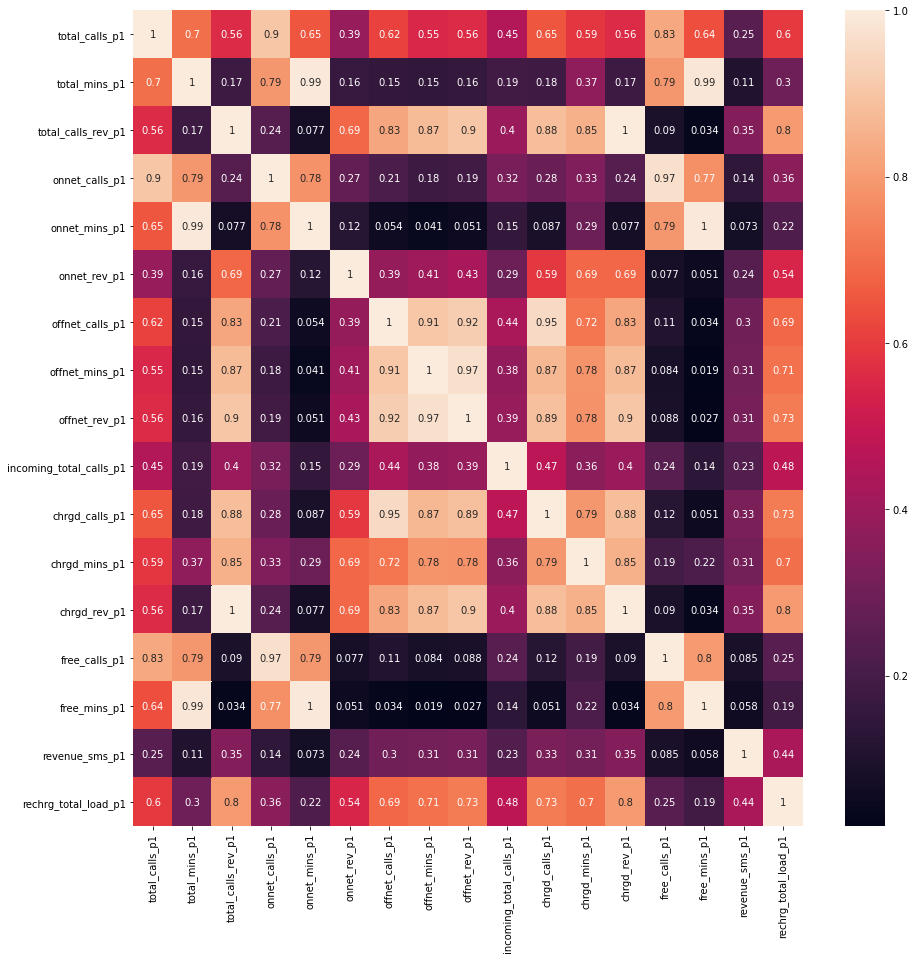

In [38]:
import seaborn as sn
corrMatrix = X_new.corr()
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Klasifikacija

In [39]:
names=[]
scores=[]
values=[]
TNS=[]
FPS=[]
FNS=[]
TPS=[]
recalls=[]
f1S=[]
rocS=[]
times=[]



In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.05, random_state=0)

#from imblearn.under_sampling import RandomUnderSampler
#undersample = RandomUnderSampler(sampling_strategy=0.5)
#X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [41]:
from sklearn import tree
import time
model=tree.DecisionTreeClassifier()
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Decision tree clasifier')


training time: 432.56 s
TP: 414
FP: 6693
FN: 6897
TN: 131649
90.7267083663064


In [42]:
#Stohastic gradient descent (SGD)
model=linear_model.SGDClassifier(max_iter=5, tol=None,class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Stochastic gradient descent (SGD) learning')

training time: 15.971 s
TP: 1710
FP: 21640
FN: 5601
TN: 116702
81.32441524746964


In [ ]:
# Random Forest

model = RandomForestClassifier(n_estimators=20, random_state=0,class_weight='balanced')
names.append('Random forest')

score,best_model=kMeans(model,X_train,Y_train)
print(score)

In [ ]:
# Random Forest without class_weight

model = RandomForestClassifier(n_estimators=20, random_state=0)
names.append('Random forest without class_weight')

score,best_model=kMeans(model,X_train,Y_train)
print(score)

In [ ]:

model=DecisionTreeClassifier(max_depth = 1,class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
tree.plot_tree(best_model)
print(score)
names.append('Decision stump')

In [ ]:
model=GaussianNB()
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Naive bayes')

In [ ]:

#perceptron
#parametar class_weight je stavljen kako bi pridavao veću težinu za pozitivan churn koji je puno manje zastupljen od
#negativnog churna
model=Perceptron(class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Perceptron')

In [ ]:
#logistics regression

model=LogisticRegression(random_state=0,max_iter=1000,class_weight='balanced')
score,best_model=kMeans(model,X_train,Y_train)
print(score)
names.append('Logistics regression')

In [ ]:

fig, ax = plt.subplots()
ax.barh(names, scores,height=0.4,align='center', color='g')
#ax.barh(names,neg_scores,height=0.4,align='center', color='r')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Acurracy')
ax.set_ylabel('Classifiers')
ax.set_title('Classifier accuracy')

In [ ]:
TP_rate=[]
FP_rate=[]
ACC=[]
precision=[]

for i in range(len(names)):
    print(names[i]+ " " + str(scores[i]))
    
print("______________________")
    
for i in range(len(names)):
    TP_rate.append(TPS[i]/(TPS[i]+FNS[i]))
    print(names[i]+ " TP rate: " + str(TPS[i]/(TPS[i]+FNS[i])))
    
print("______________________")
    
for i in range(len(names)):
    FP_rate.append(str(FPS[i]/(FPS[i]+TNS[i])))
    print(names[i]+ " FP rate: " + str(FPS[i]/(FPS[i]+TNS[i])))
    
    
print("______________________")

for i in range(len(names)):
    ACC.append((TPS[i]+TNS[i])/(FPS[i]+TNS[i]+TPS[i]+FNS[i]))
    print(names[i]+ " ACC: " + str((TPS[i]+TNS[i])/(FPS[i]+TNS[i]+TPS[i]+FNS[i])))
    
print("______________________")
    
for i in range(len(names)):
    precision.append(TPS[i]/(TPS[i]+FPS[i]))
    print(names[i]+ " Precision : " + str(TPS[i]/(TPS[i]+FPS[i])))
    
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " Recall : " + str(recalls[i]))
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " F-measure : " + str(f1S[i]))

print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " ROC area : " + str(rocS[i]))
    
print("______________________")
    
for i in range(len(names)):
    print(names[i]+ " Time to build : " + times[i])

    
col_labels=names
row_labels=['TP rate','FP rate','Accuracy','Precision','Recall','F-measure','ROC area']
table_vals=[]
table_vals.append(TP_rate)
table_vals.append(FP_rate)
table_vals.append(ACC)
table_vals.append(precision)
table_vals.append(recalls)
table_vals.append(f1S)
table_vals.append(rocS)
table_vals=np.transpose(table_vals)

In [ ]:
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()

Rezultati obrade na većem datasetu
- ovdje nisam uspio dobiti iste rezultate kao u članku, što se dijelom i očekivalo s obzirom da nije isti dataset odnosno nije navedeno kako su ga obradili (višak stupaca...)
- rezultate sam pokušao poboljšat sa uvođenjem različitih težina pogreške, s obzirom da dataset nije ujednačen što se tiče postotka churn i ne-churn korisnika
- također sam pokušao raditi oversampling/undersampling dataseta da se smanji da neujednačenost, rezultati su slični kao razlika između random forest algoritma i random forest without class_weight algoritma
- random forest ima dodatni parametar class_weight=balanced, što znači da će biti različite težine za različite klase, odnosno manje će se osjetiti neujednačenost podataka
- ovo rezultira manjem rezultatu na accuracy-u, ali boljem rezultatu što se tiče tp rate i fp rate, te na ROC area

In [ ]:
from sklearn.cluster import KMeans


X_big = pd.read_csv('dataset_1_south_asia.csv')
X_big.columns = [c.strip().lower().replace(' ', '_') for c in X_big.columns]

#zanimaju nas samo korisnici sa churn=T, odnosno samo oni koji su prešli na drugu mrežu

X_big = X_big[X_big.churn != 'F']
Y_big=X_big.pop('churn')

X_big = X_big[['total_calls_p1','total_mins_p1','total_calls_rev_p1','onnet_calls_p1','onnet_mins_p1','onnet_rev_p1','offnet_calls_p1','offnet_mins_p1','offnet_rev_p1','incoming_total_calls_p1','chrgd_calls_p1','chrgd_mins_p1','chrgd_rev_p1','free_calls_p1','free_mins_p1','revenue_sms_p1','rechrg_total_load_p1']]

Y_big = Y_big.map({'T':1 ,'F':0})

X=X_big
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
first= X[0:0]
second=X[0:0]
third=X[0:0]

for y,row in zip(y_kmeans,X.iterrows()):
    #print (type(row[1]))
    if(y==0):
        first=first.append(row[1],ignore_index=True)
    elif(y==1):
        second=second.append(row[1])
    elif(y==2):
        third=third.append(row[1])
        
first.describe()


In [ ]:
second.describe()

In [ ]:
third.describe()

In [ ]:
names=["first","second","third"]
avg_night=[np.average(first.onnet_mins_p1),np.average(second.onnet_mins_p1),np.average(third.onnet_mins_p1)]
avg_day=[np.average(first.free_mins_p1),np.average(second.free_mins_p1),np.average(third.free_mins_p1)]
avg_eve=[np.average(first.chrgd_mins_p1),np.average(second.chrgd_mins_p1),np.average(third.chrgd_mins_p1)]
avg_intl=[np.average(first.offnet_mins_p1),np.average(second.offnet_mins_p1),np.average(third.offnet_mins_p1)]
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(avg_day))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, avg_day, color ='r', width = barWidth,
        edgecolor ='grey', label ='onnet_mins_p1')
plt.bar(br2, avg_night, color ='g', width = barWidth,
        edgecolor ='grey', label ='free_mins_p1')
plt.bar(br3, avg_eve, color ='b', width = barWidth,
        edgecolor ='grey', label ='chrgd_mins_p1')
plt.bar(br4, avg_intl, color ='y', width = barWidth,
        edgecolor ='grey', label ='offnet_mins_p1')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([0.1+r + barWidth for r in range(len(avg_day))],
        ['First', 'Second', 'Third'])
 
plt.legend()

plt.show()

In [ ]:
names=["first","second","third"]
avg_night=[np.average(first.onnet_calls_p1),np.average(second.onnet_calls_p1),np.average(third.onnet_calls_p1)]
avg_day=[np.average(first.offnet_calls_p1),np.average(second.offnet_calls_p1),np.average(third.offnet_calls_p1)]
avg_eve=[np.average(first.chrgd_calls_p1),np.average(second.chrgd_calls_p1),np.average(third.chrgd_calls_p1)]
avg_intl=[np.average(first.free_calls_p1),np.average(second.free_calls_p1),np.average(third.free_calls_p1)]
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(avg_day))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, avg_day, color ='r', width = barWidth,
        edgecolor ='grey', label ='onnet_calls_p1')
plt.bar(br2, avg_night, color ='g', width = barWidth,
        edgecolor ='grey', label ='offnet_calls_p1')
plt.bar(br3, avg_eve, color ='b', width = barWidth,
        edgecolor ='grey', label ='chrgd_calls_p1')
plt.bar(br4, avg_intl, color ='y', width = barWidth,
        edgecolor ='grey', label ='free_calls_p1')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([0.1+r + barWidth for r in range(len(avg_day))],
        ['First', 'Second', 'Third'])
 
plt.legend()

plt.show()

In [ ]:
names=["first","second","third"]
avg_night=[np.average(first.onnet_rev_p1),np.average(second.onnet_rev_p1),np.average(third.onnet_rev_p1)]
avg_day=[np.average(first.offnet_rev_p1),np.average(second.offnet_rev_p1),np.average(third.offnet_rev_p1)]
avg_eve=[np.average(first.chrgd_rev_p1),np.average(second.chrgd_rev_p1),np.average(third.chrgd_rev_p1)]
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(avg_day))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, avg_day, color ='r', width = barWidth,
        edgecolor ='grey', label ='onnet_rev_p1')
plt.bar(br2, avg_night, color ='g', width = barWidth,
        edgecolor ='grey', label ='offnet_rev_p1')
plt.bar(br3, avg_eve, color ='b', width = barWidth,
        edgecolor ='grey', label ='chrgd_rev_p11')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(avg_day))],
        ['First', 'Second', 'Third'])
 
plt.legend()

plt.show()

Profiliranje - komentiranje rezultata
- dobiveni rezultati nisu slični onima iz članka, ne znam je li stvar do postupka, dataseta, ili možda nisam dobro shvatio taj dio članka

# Proširenje projekta

### Ansambli - random forest, logistička regresija i SVM

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


X_small = pd.read_csv('dataset_2_churn-bigml.csv')
X_small.columns = [c.strip().lower().replace(' ', '_') for c in X_small.columns] 
#Preimenovanje u mala slova i bez razmaka za lakše rukovanje sa podatcima

Y_small=X_small.pop('churn')
#uklanjanje ciljne varijable iz dataseta

X_small.drop(('state'), axis=1, inplace=True)
#uklananje ne-numeričke značajke iz dataseta

Y_small = Y_small.map({'T':1 ,'F':0})
#za churn se prije koristilo T za pozitivne i F za negativne vrijednosti, što nije radilo sa programskim paketima,
#pa sam zamijenio sa 1 i 0


# class distribution
print(Counter(Y_small))

# Oversampling X, y
# Oversampling may increase the likelihood of overfitting occurring, since it makes exact copies of the minority class examples
X_small, Y_small = RandomOverSampler(sampling_strategy=0.5).fit_resample(X_small, Y_small)

# Undersampling X, y
# With Undersampling valuable information can be deleted as we randomly remove it from our data
# set since we have no way to detect or preserve the examples that are information rich in the majority class
#X_small, Y_small = RandomUnderSampler(sampling_strategy=0.8).fit_resample(X_small, Y_small)

# Combining both random sampling methods can occasionally result in overall improved performance
# in comparison to the methods being performed in isolation

# new class distribution 
print(Counter(Y_small))

Counter({0: 2850, 1: 483})
Counter({0: 2850, 1: 1425})


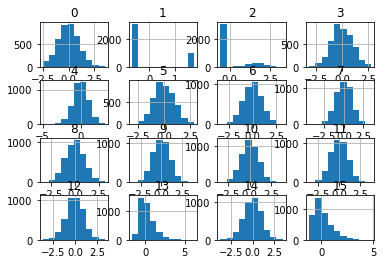

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.090371,-0.684976,-0.557799,-0.326631,-0.375196,-0.326387,-0.546249,0.297799,-0.546652,0.832586,-2.315290,0.833625,2.080528,-0.565216,2.074696,0.180536
1,-0.914752,-0.519201,-0.557799,-0.957174,1.795765,-0.956928,0.494050,-0.859965,0.493425,0.139942,0.549593,0.141671,0.840780,0.621825,0.841465,1.511126
2,0.442164,-0.684976,-0.557799,-0.800391,-0.572556,-0.800546,-0.653048,-1.111653,-0.653684,1.239789,-0.115469,1.241700,1.124151,0.621825,1.130094,0.845831
3,-0.939880,-0.684976,1.460450,-0.053964,-0.473876,-0.053720,-0.668870,-0.104902,-0.669972,-0.740334,-0.729373,-0.741014,0.096931,0.226145,0.093655,0.180536
4,-0.412191,1.730608,-0.557799,0.460696,0.315565,0.460537,0.492072,0.146786,0.491098,-0.768280,0.805386,-0.767628,-0.930289,-0.565216,-0.929664,-1.150055


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, Y_train, Y_test = train_test_split(X_small, Y_small, test_size=0.05, random_state=0)

#If scaler is used before train_test_split, data leakage will happen so we use it after train_test_split

#MinMaxScaler transforms each value in the column proportionally within the range [0,1]
#It preserves the shape of the dataset (no distortion)

#X_train = MinMaxScaler().fit_transform(X_train)

#StandardScaler transforms each value in the column to range about the mean 0 and standard deviation 1
#StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers

X_train = StandardScaler().fit_transform(X_train)

X_train = pd.DataFrame(X_train)

X_train.hist()
plt.show()
display(X_train.head())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#parametar scoring predstavlja vlastitu funkciju gubitka
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')
# Fit the random search model

rf_random.fit(X_train,Y_train)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

clf1 = LogisticRegression(random_state=1,max_iter=1000,class_weight='balanced')
clf2 = best_model
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto',class_weight='balanced'))
clf4 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
rf_random.best_params_
best_model = rf_random.best_estimator_

rocS=[]
names=[]

base_model = RandomForestClassifier(n_estimators=50, random_state=1,class_weight='balanced')
scoress = cross_val_score(base_model, X_small, Y_small, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), "base random forest"))

Y_predicted=best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print("TP: "+ str(tp))
print("FP: "+ str(fp))
print("FN: "+ str(fn))
print("TN: "+ str(tn))

roc=roc_auc_score(Y_test, Y_predicted)
rocS.append(roc)
names.append("base random forest")


scoress = cross_val_score(best_model, X_small, Y_small, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), "best random forest params"))

Y_predicted=best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print("TP: "+ str(tp))
print("FP: "+ str(fp))
print("FN: "+ str(fn))
print("TN: "+ str(tn))

roc=roc_auc_score(Y_test, Y_predicted)
rocS.append(roc)
names.append("best random forest")
    
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()


Accuracy: 0.71 (+/- 0.02) [Logistic Regression]
TP: 23
FP: 36
FN: 3
TN: 105
Accuracy: 0.93 (+/- 0.01) [Random Forest]
TP: 15
FP: 0
FN: 11
TN: 141
Accuracy: 0.86 (+/- 0.01) [SVM]
TP: 22
FP: 15
FN: 4
TN: 126
Accuracy: 0.87 (+/- 0.00) [Adaboost]
TP: 12
FP: 3
FN: 14
TN: 138
Accuracy: 0.89 (+/- 0.01) [Ensemble]
TP: 22
FP: 7
FN: 4
TN: 134


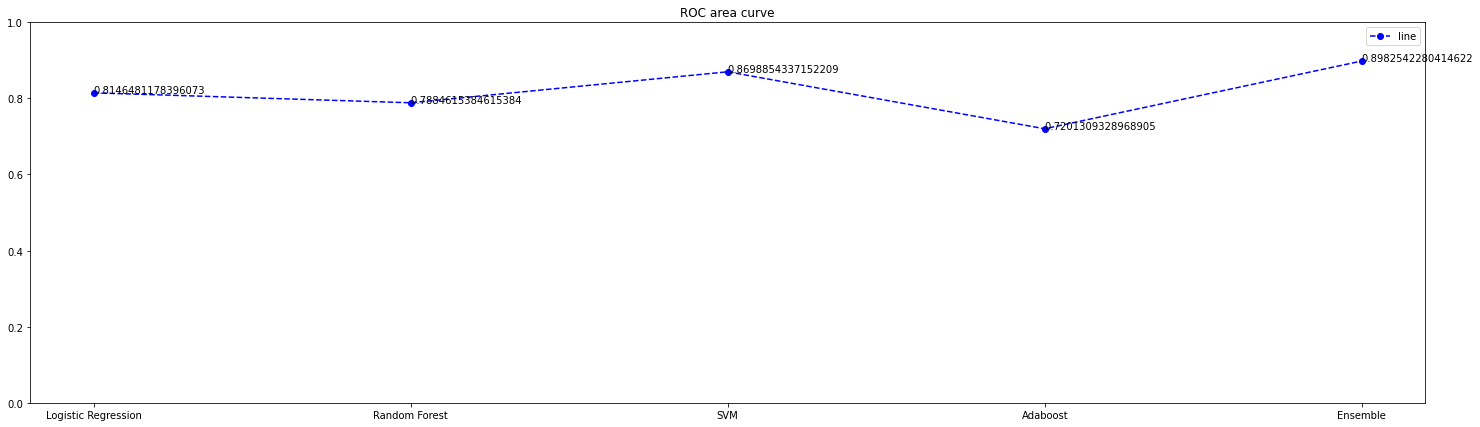

In [7]:
rocS=[]
names=[]

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)],voting='hard',weights=[1,1,1])
for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['Logistic Regression', 'Random Forest', 'SVM','Adaboost', 'Ensemble']):
    scoress = cross_val_score(clf, X_small, Y_small, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), label))
    best_model=clf.fit(X_train,Y_train)
    Y_predicted=best_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
    print("TP: "+ str(tp))
    print("FP: "+ str(fp))
    print("FN: "+ str(fn))
    print("TN: "+ str(tn))

    roc=roc_auc_score(Y_test, Y_predicted)
    rocS.append(roc)
    names.append(label)
    
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()

#### Prema rezultatima za mali dataset, ensemble metoda je najbolji model prema ROC rezultatu gdje je vidljivo poboljšanje, a što se tiče odabira parametara najboljeg modela, metodom grid search utvrđeni su najbolji parametri za koje je poboljšanje minimalno u odnosu na prethodno trenirani model

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

X_big_raw = pd.read_csv('dataset_1_south_asia.csv')
X_big = X_big_raw
X_big.columns = [c.strip().lower().replace(' ', '_') for c in X_big.columns]
X_big = X_big[['total_calls_p1','total_mins_p1','total_calls_rev_p1','onnet_calls_p1','onnet_mins_p1','onnet_rev_p1','offnet_calls_p1','offnet_mins_p1','offnet_rev_p1','incoming_total_calls_p1','chrgd_calls_p1','chrgd_mins_p1','chrgd_rev_p1','free_calls_p1','free_mins_p1','revenue_sms_p1','rechrg_total_load_p1','churn']]
Y_big=X_big.pop('churn')
Y_big =Y_big.map({'T':1 ,'F':0})

       total_calls_p1  total_mins_p1  total_calls_rev_p1  onnet_calls_p1  \
count    2.913060e+06   2.913060e+06        2.913060e+06    2.913060e+06   
mean     2.161798e+02   7.277388e+02        2.838196e+02    1.312645e+02   
std      3.825835e+02   2.073644e+03        5.326627e+02    3.082420e+02   
min      0.000000e+00   0.000000e+00        0.000000e+00    0.000000e+00   
25%      1.200000e+01   1.372000e+01        1.760000e+01    3.000000e+00   
50%      7.400000e+01   1.042700e+02        1.031500e+02    2.400000e+01   
75%      2.420000e+02   4.402900e+02        3.210000e+02    1.050000e+02   
max      2.100700e+04   1.121461e+05        6.860983e+04    2.098800e+04   

       onnet_mins_p1  onnet_rev_p1  offnet_calls_p1  offnet_mins_p1  \
count   2.913060e+06  2.913060e+06     2.913060e+06    2.913060e+06   
mean    6.222429e+02  7.856006e+01     8.406379e+01    1.030951e+02   
std     2.052070e+03  1.897033e+02     1.688478e+02    2.220406e+02   
min     0.000000e+00  0.000000e

In [24]:
# Information gain and correlation attribute ranking are computed in Weka with a reduced sample size because of hardware limitations
# Original dataset made Weka run out of memory (with 10GB allocated for Weka)

reduced_dataset = X_big_raw.sample(50000)
reduced_dataset.to_csv('reduced_dataset.csv', index=False)


Regarding the P1, P2, P3, P4, P5 and P6 labels, our first guess was that they were some telecom industries standard.
However it seems that they are just used internaly in the company that made the dataset.
Since we have no idea what they represent, we made information gain and correlation attribute ranking for every label.
The results show that P2 has the highest information gain and correlation attribute ranking so we have no idea why the
original authors used P1.

![P1 information gain](img/p1_info.png)
![P1 correlation attribute ranking](img/p1_corr.png)
![P2 information gain](img/p2_info.png)
![P2 correlation attribute ranking](img/p2_corr.png)

In [17]:
X_big=X_big.sample(10000)
Y_big=Y_big.sample(10000)

# class distribution
print(Counter(Y_big))

# Oversampling X, y
X_big, Y_big = RandomOverSampler(sampling_strategy=0.5).fit_resample(X_big, Y_big)

# Undersampling X, y
#X_big, Y_big = RandomUnderSampler(sampling_strategy=0.8).fit_resample(X_big, Y_big)

# new class distribution 
print(Counter(Y_big))

Counter({0: 9503, 1: 497})
Counter({0: 9503, 1: 4751})


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X_big, Y_big, test_size=0.05, random_state=0)

#If scaler is used before train_test_split, data leakage will happen so we use it after train_test_split

#X_train = MinMaxScaler().fit_transform(X_train)

X_train = StandardScaler().fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.hist()
plt.show()
display(X_train.head())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')
# Fit the random search model
rf_random.fit(X_train,Y_train)



In [ ]:
rf_random.best_params_
best_model = rf_random.best_estimator_

rocS=[]
names=[]

base_model = RandomForestClassifier(n_estimators=50, random_state=1,class_weight='balanced')
scoress = cross_val_score(base_model, X_big, Y_big, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), "base random forest"))

Y_predicted=best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print("TP: "+ str(tp))
print("FP: "+ str(fp))
print("FN: "+ str(fn))
print("TN: "+ str(tn))

roc=roc_auc_score(Y_test, Y_predicted)
rocS.append(roc)
names.append("base random forest")


scoress = cross_val_score(best_model, X_big, Y_big, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), "best random forest params"))

Y_predicted=best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print("TP: "+ str(tp))
print("FP: "+ str(fp))
print("FN: "+ str(fn))
print("TN: "+ str(tn))

roc=roc_auc_score(Y_test, Y_predicted)
rocS.append(roc)
names.append("best random forest")
    
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()


In [ ]:
clf1 = LogisticRegression(random_state=1,max_iter=10000,class_weight='balanced')
clf2 = best_model
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto',class_weight='balanced'))
clf4 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
rocS=[]
names=[]

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)],voting='hard',weights=[1,1,1])
for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['Logistic Regression', 'Random Forest', 'SVM','Adaboost', 'Ensemble']):
    scoress = cross_val_score(clf, X_big, Y_big, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scoress.mean(), scoress.std(), label))
    best_model=clf.fit(X_train,Y_train)
    Y_predicted=best_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
    print("TP: "+ str(tp))
    print("FP: "+ str(fp))
    print("FN: "+ str(fn))
    print("TN: "+ str(tn))

    roc=roc_auc_score(Y_test, Y_predicted)
    rocS.append(roc)
    names.append(label)
    
plt.figure(figsize=(25, 7))
plt.title("ROC area curve")
plt.plot(names,rocS, '--bo', label='line')
plt.ylim([0, 1])
for x, y in zip(range(len(names)), rocS):
    plt.text(x, y, y)

plt.legend()